# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import flatiron_stats
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

C:\Users\wblak\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.FormalEducation.unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [6]:
#Your code here
education_salary = df[(df.FormalEducation.notnull()) & (df.AdjustedCompensation.notnull())]
df1 = education_salary[education_salary['FormalEducation']=="Master's degree"]['AdjustedCompensation']
df2 = education_salary[education_salary['FormalEducation']=="Bachelor's degree"]['AdjustedCompensation']

In [12]:
print("Masters Degree:{} and Bachelors Degree:{}".format(round(df1.describe(),2), round(df2.describe(),2)))

Masters Degree:count       1990.00
mean       69139.90
std       135527.21
min            0.00
25%        21868.00
50%        53812.17
75%        92000.00
max      4498900.00
Name: AdjustedCompensation, dtype: float64 and Bachelors Degree:count       1107.00
mean       64887.10
std       306935.87
min            0.00
25%        11266.20
50%        38399.40
75%        80231.00
max      9999999.00
Name: AdjustedCompensation, dtype: float64


In [13]:
flatiron_stats.p_value_welch_ttest(df1,df2)

0.33077639451272445

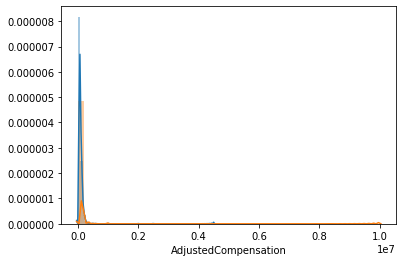

In [14]:
sns.distplot(df1)
sns.distplot(df2)

The p-value calculated results in the null hypothesis not being rejected, but the data suggests that outliers may be influencing the results.

In [19]:
iqr1 = stats.iqr(df1, interpolation='midpoint')
iqr2 = stats.iqr(df2, interpolation='midpoint')
df1_outlier = (iqr1*1.5) + 92000
df2_outlier = (iqr2*1.5) + 80231
print(df1_outlier, df2_outlier)

197198.0 183678.2


In [20]:
outlier = 200000
df1_cleaned = education_salary[(education_salary['FormalEducation']=="Master's degree") & 
                               (education_salary['AdjustedCompensation']<=outlier)]['AdjustedCompensation']
df2_cleaned = education_salary[(education_salary['FormalEducation']=="Bachelor's degree") & 
                               (education_salary['AdjustedCompensation']<=outlier)]['AdjustedCompensation']

In [21]:
print("Masters Degree:{} and Bachelors Degree:{}".format(round(df1_cleaned.describe(),2), round(df2_cleaned.describe(),2)))
print(flatiron_stats.p_value_welch_ttest(df1_cleaned, df2_cleaned))

Masters Degree:count      1940.00
mean      59483.62
std       46388.06
min           0.00
25%       21345.00
50%       50772.40
75%       89208.01
max      200000.00
Name: AdjustedCompensation, dtype: float64 and Bachelors Degree:count      1085.00
mean      49997.29
std       46307.12
min           0.00
25%       10934.00
50%       36863.42
75%       78000.00
max      200000.00
Name: AdjustedCompensation, dtype: float64
3.67367194442636e-08


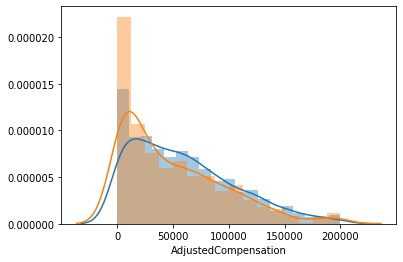

In [22]:
sns.distplot(df1_cleaned)
sns.distplot(df2_cleaned)

Once the data has been cleaned by removing outliers over the amount of 200000, the p-test results indicate that the null hypothesis is rejected and there is a probability that Master's degree holders earn more than Bachelor's degree holders.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [23]:
#Your code here
df_doc = education_salary[education_salary['FormalEducation']=="Doctoral degree"]['AdjustedCompensation']
df_bach = education_salary[education_salary['FormalEducation']=="Bachelor's degree"]['AdjustedCompensation']

In [24]:
print("Doctoral Degree:{} and Bachelors Degree:{}".format(round(df_doc.describe(),2), round(df_bach.describe(),2)))
print(flatiron_stats.p_value_welch_ttest(df_doc, df_bach))

Doctoral Degree:count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.352000e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64 and Bachelors Degree:count       1107.00
mean       64887.10
std       306935.87
min            0.00
25%        11266.20
50%        38399.40
75%        80231.00
max      9999999.00
Name: AdjustedCompensation, dtype: float64
0.15682381994720251


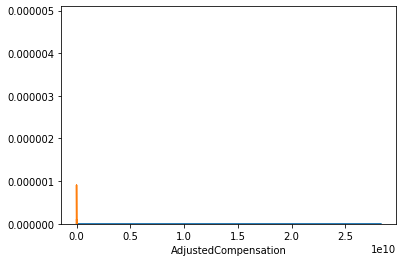

In [25]:
sns.distplot(df_doc)
sns.distplot(df_bach)

In [26]:
iqr_doc = stats.iqr(df_doc, interpolation='midpoint')
iqr_bach = stats.iqr(df_bach, interpolation='midpoint')
dfdoc_outlier = (iqr_doc*1.5) + 92000
dfbach_outlier = (iqr_bach*1.5) + 80231
print(dfdoc_outlier, dfbach_outlier)

212000.0 183678.2


In [27]:
outlier = 220000
dfdoc_cleaned = education_salary[(education_salary['FormalEducation']=="Doctoral degree") & 
                               (education_salary['AdjustedCompensation']<=outlier)]['AdjustedCompensation']
dfbach_cleaned = education_salary[(education_salary['FormalEducation']=="Bachelor's degree") & 
                               (education_salary['AdjustedCompensation']<=outlier)]['AdjustedCompensation']
print("Doctora Degree:{} and Bachelors Degree:{}".format(round(dfdoc_cleaned.describe(),2), round(dfbach_cleaned.describe(),2)))
print(flatiron_stats.p_value_welch_ttest(dfdoc_cleaned, dfbach_cleaned))

Doctora Degree:count       928.00
mean      78530.69
std       52557.51
min         -73.52
25%       37306.46
50%       71749.56
75%      112080.85
max      220000.00
Name: AdjustedCompensation, dtype: float64 and Bachelors Degree:count      1091.00
mean      50876.99
std       47677.06
min           0.00
25%       10934.00
50%       37129.45
75%       80000.00
max      220000.00
Name: AdjustedCompensation, dtype: float64
0.0


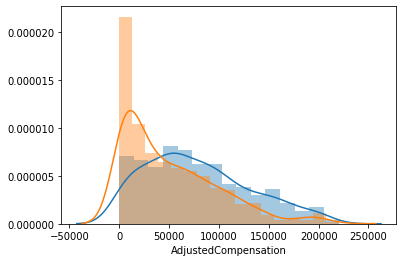

In [28]:
sns.distplot(dfdoc_cleaned)
sns.distplot(dfbach_cleaned)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [29]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [30]:
df_out = df[df['AdjustedCompensation']<=220000]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df_out).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  4.017024e+11     6.0  27.489903  2.356930e-32
Residual            1.032876e+13  4241.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!